<h1 style = "color : blue"> The Sparks Foundation </h1>
  
    
## Data Science and Business Analytics



Author : Ajazahmed I. Turki

Task : Prediction using Decision Tree Algorithm


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

### Loading the Data

In [2]:
iris = pd.read_csv('GRIP/iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [77]:
# splitting the data into features and target variables

X = iris.drop(['Id', 'Species'], axis = 1)
y = iris['Species']

### Visualizing the Distribution of Features

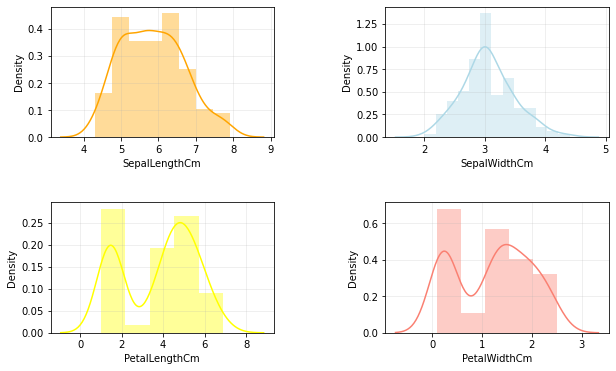

In [78]:
cols = X.columns  #Feature Names

colors = ['orange', 'lightblue', 'yellow', 'salmon']  #Colors for plots
plt.figure(figsize = (10, 6))                         #Figure Size
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)       #Vertical and Horizontal space between plots

for idx, c in enumerate(cols):
    ax = plt.subplot(2, 2, idx + 1)
    sns.distplot(X[c], color = colors[idx])  
    plt.grid(alpha = 0.25)
    ax.set_xlabel(cols[idx])
plt.show()

In [140]:
# Splitting the data into training and testing set

train_x, test_x, train_y, test_y = train_test_split(X,  y, test_size = 0.25, stratify = y)

In [141]:
#Normalizing the Data
#Calling the Normalizer/Scaler

min_max = MinMaxScaler()

In [162]:
#Decision Tree Algorithm

tree_clf = DecisionTreeClassifier(criterion = 'entropy', 
                                  max_depth = 3, 
                                 random_state = 0)

### Classifier Pipeline with Scaler

In [163]:
classifier = Pipeline([
    ('scaler', min_max), 
    ('clf', tree_clf)
])

In [164]:
#Training the Model

classifier.fit(train_x, train_y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('clf',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        random_state=0))])

In [165]:
#Final Predictions

predictions = classifier.predict(test_x)

In [170]:
print('Training Accuracy : ', classifier.score(train_x, train_y)*100, '%')
print("Testing Accuracy : ", classifier.score(test_x, test_y)*100, '%')

Training Accuracy :  98.21428571428571 %
Testing Accuracy :  97.36842105263158 %


### Precision and Recall of Classifier


In [167]:
print(classification_report(test_y, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



### Visualizing the Tree

In [168]:
def plot_tree(clf):
    plt.figure(figsize = (10, 8))
    tree.plot_tree(clf,
                  feature_names = X.columns,
                  class_names = y.unique(), 
                  rounded = True)
    plt.show()

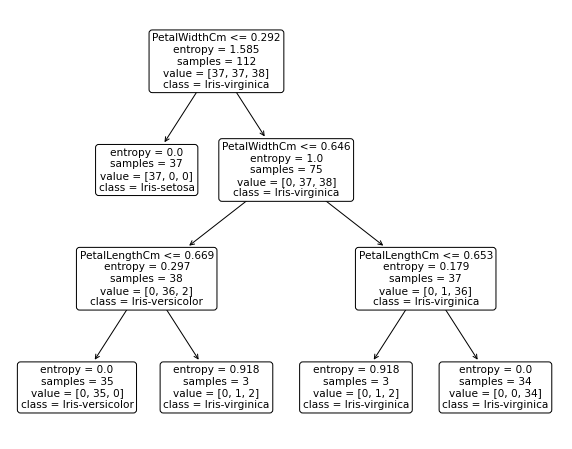

In [169]:
plot_tree(tree_clf)

In [183]:
def predict():
    sepal_length = float(input('Enter Sepal Length in cm : '))
    sepal_width = float(input('Enter Sepal width in cm : '))
    petal_length = float(input('Enter Petal Length in cm : '))
    petal_width = float(input('Enter Petal Width in cm : '))
    
    predicted_class = classifier.predict([[sepal_length, sepal_width, petal_length, petal_width]])
    print('\n')
    
    print('Class : ', predicted_class[0])

In [184]:
predict()

Enter Sepal Length in cm :  1.2
Enter Sepal width in cm :  1.1
Enter Petal Length in cm :  2.2
Enter Petal Width in cm :  1.1




Class :  Iris-versicolor


# Thank You